# Disciplina: Ciência de Dados (DCA-0131)
Prof. Luiz Affonso Guedes

### Departamento de Engenharia de Computação e Automação - DCA

UFRN - 2023

*OBS: Favor fazer cópia do notebook antes de alterá-lo.

# AULA 11 - Aprendizagem Supervisionada com o Pacote Sklearn
Apresentar as principais funcionalidades do pacote SKLEARN, utilizando aprendizagem supervisionada como exemplo (o algoritmo KNN).


# Estrutura Geral do Processo
- Carregar pacotes
- Definir modelo de aprendizagem/predição
- Carregar dados
- Preparar dados (features, target) - para o caso supervisionado (são arrays numPy)
- Separar dados de Treinamento e de Teste
- Binarizar os dados
- Fazer aprendizagem
    - Para classificação utilizar método MODELO_ESCOLHIDO.fit(parametros)
    - Para predição utilizar método MODELO_ESCOLHIDO.predict(parametros)
- Avaliação do modelo


### 1. Introdução ao pacote SciKit-Learn
- Princípios de funcionamento.


In [1]:
# Exemplo utilizando dataset do pacote Seaborn

# O Pacote Seaborn possui o dataset Iris
# O método .load_set(.) retorna um dataFrame.

import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


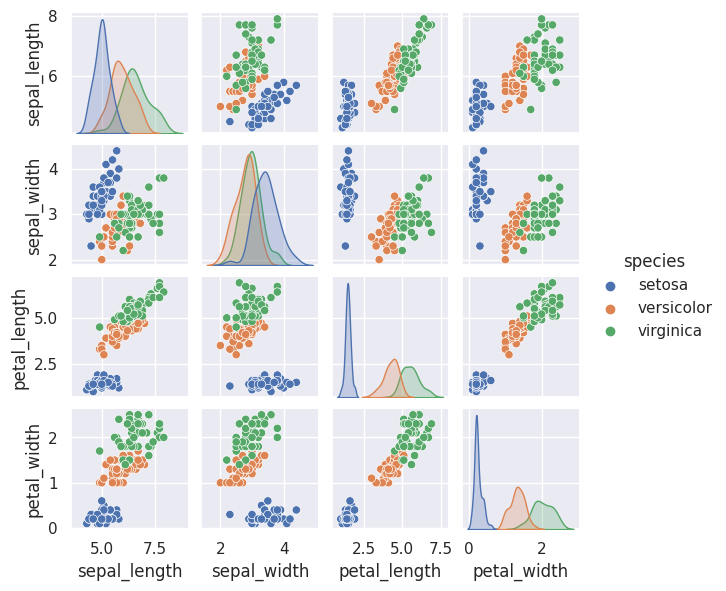

In [2]:
# Fase EDA (Exploration Dara Analisys) - verificar visualmente com os dados estão disposto
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

Para se usar o Scikit-Learn, nós iremos extrair a matriz de features e o array target a partir do DataFrame.

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

#### 1.1 Utilizando o pacote Sklearn
Este pacote já possui o dataset 'iris'. Notar que as variáveis feature e target são do tipo numPy array (bidimensional e unidimensional, respectivamente).

In [5]:
# Exemplo de verificação do dataset Iris do pacote Scikit-learn

# Pacote scikitlearn (classe datasets)
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
iris = datasets.load_iris()
print(type(iris))

print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
# Verificação dos tipos dos dados do dataset Iris

print(type(iris.data))
print(type(iris.target))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:

iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Como as variáveis de data (features) são tipos numpy, iremos convertê-las para Dataframe Pandas.

In [10]:
# Convertendo para DataFrame
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


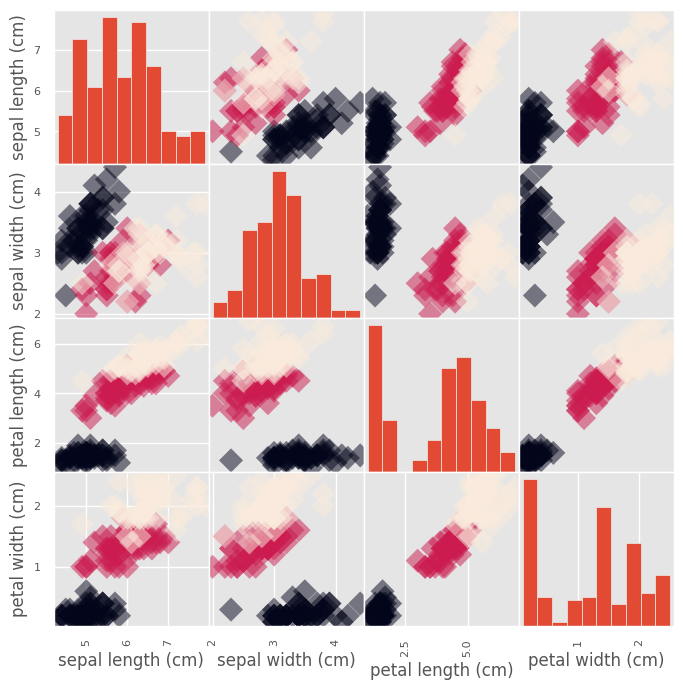

In [11]:
pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8], s=150, marker = 'D')
plt.show()

### 1.2 Exercício
Acesse o site do UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

- dados sobre os votos dos congressistas americanos.

O objetivo é predizer o partido do congressista ('Democrat' ou 'Republican') baseda somente nos votos deles.


In [12]:
#dados1 = pd.read_csv('arquivo_congresso.txt', header = None)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [22]:
# Renomeie os nomes das colunas

# 0. party: 2 (democrat, republican)
# 1. infants: 2 (y,n)
# 2. water: 2 (y,n)
# 3. budget: 2 (y,n)
# 4. physician: 2 (y,n)
# 5. salvador: 2 (y,n)
# 6. religious: 2 (y,n)
# 7. satellite: 2 (y,n)
# 8. aid: 2 (y,n)
# 7. Attribute Information:
# 9.  missile: 2 (y,n)
# 10. immigration: 2 (y,n)
# 11. synfuels: 2 (y,n)
# 12. education: 2 (y,n)
# 13. superfund: 2 (y,n)
# 14. crime: 2 (y,n)
# 15. duty-free-exports: 2 (y,n)
# 16. eaa_rsa: 2 (y,n)

# Carregar os dados a partir do URL e atribuir nomes às colunas
column_names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
                'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
                'education', 'superfund', 'crime', 'duty-free-exports', 'eaa_rsa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=column_names)

# Exibir o DataFrame com os nomes de colunas atualizados
df



,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty-free-exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


Transforme os dados para binários:
- y --> 0
- n --> 1
- democrat --> 0
- republican --> 1

In [23]:
# Trate os missing data
# Sugestão - utilize um sistema de descarte simples

dfnovo = df.replace(['y', 'n', '?'], [0,1,np.nan]).dropna()
dfnovo

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty-free-exports,eaa_rsa
5,democrat,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
8,republican,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
19,democrat,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
23,democrat,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
25,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,democrat,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
426,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
427,republican,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
430,republican,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Transformação dos dados categóricos para binários

#dfnovo.mean()

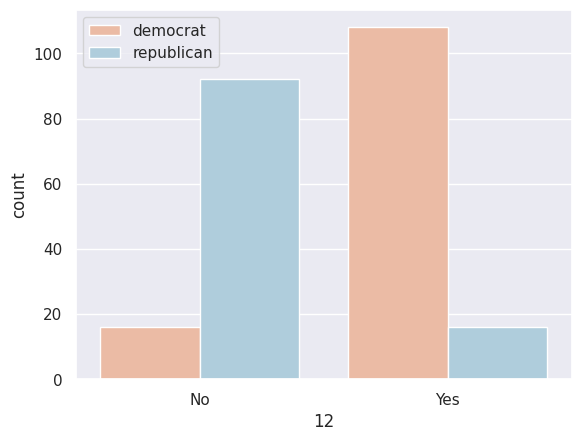

In [14]:
# Exercutar o seguinte programa
import seaborn as sns
sns.set()

plt.figure()
#sns.countplot(x='education', hue='party', data=dfnovo, palette='RdBu')
sns.countplot(x=12, hue=0, data=dfnovo, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Repita o procedimento para variáveis 'satellite' e 'missile'

Qual é a sua conclusão?

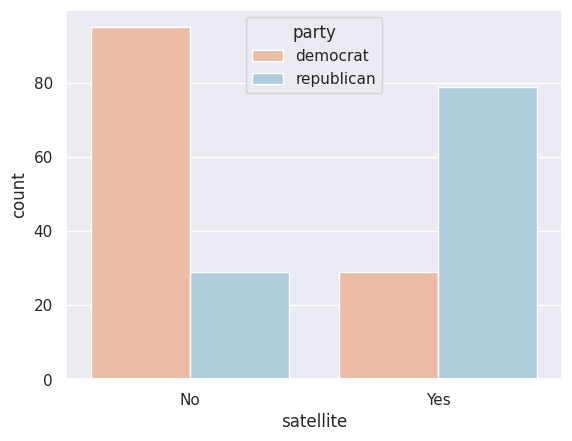

In [26]:
# Análise para a variável 'satellite'
import seaborn as sns
sns.set()

plt.figure()
sns.countplot(x = 'satellite', hue = 'party', data=dfnovo, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()


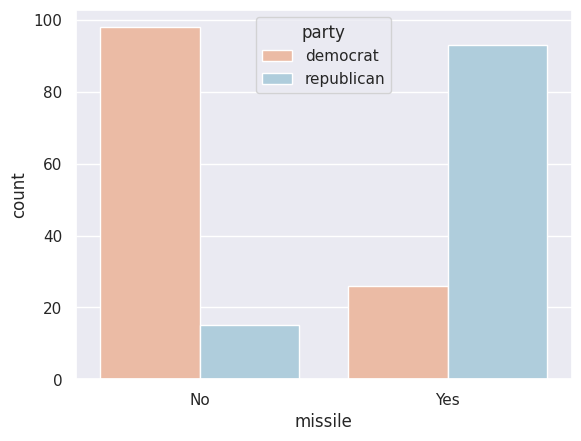

In [27]:
# Análise para a variável 'missile'
import seaborn as sns
sns.set()
plt.figure()
sns.countplot(x = 'missile', hue = 'party', data=dfnovo, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

## 2. Classificação com o Pacote Sklearn
 O pacote Sklearn já implementa os princiapis métodos e métricas de aprendizagem de máquinas, como:K-NN, Naive-Bayesian, Decision Tree, Random Forest, Regressão Logística, SVM, etc.

 Aqui utilizaremos o algoritmo KNN como exempo de uso do pacote Sklearn para o contexto de classificação de dados.


### 2.1 Uso do Algoritmo K-NN para Classificação de Dados

Procedimento padrão:
- Importar classificador a partir do pacote 'sklearn'
- Carregar o dataframe
- Obter os arrays (numPy) de características (features - bidimensional) e target (unidimensional)
- Binarizar os dados
- Escolher conjuntos de treinamento e conjunto de teste
- Fazer o treinamento (método .fit(X_train, y_train))
- Analisar Resultado (avaliação via métodos .predict(X_new) ou .score(X_test))

#### 2.1.1 Exemplo com o Dataset 'iris'.

Importação do dataset Iris do Pacote Sklearn.

Instanciação do dataset via comando load_irirs().
- o dataset contém tributo (key) - valor (value).



In [28]:
# Carregamento do dataset 'iris' a partir do Pacote sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [29]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


O valor da key DESCR é uma descrição resumida do dataset.



In [30]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


O valor da key target_names é um array de strings, contendo as espécieis de flores que se deseja predizer.


In [31]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


O valor de feature_names é uma lista de strings, fornecendo a descrição de cada atributo (feature):

In [32]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Os dados são compostos de campos de target e atributos (features).

Os dados contêm medidas numéricas (do tipo Array Numpy) dos seguintes atribuitos: sepal length, sepal width, petal length e petal width.


In [33]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


 As linhas do array de dados correspondem às flores, enquanto que as colunas representam uma das 4 classes possíveis de espécieis de flores (orquídea).


In [34]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


O array target contém as espécieis de cada flor que foi medida, também é um NumPy array.


In [35]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


A target é um array uni-dimencional, com uma entrada para cada flor.

In [36]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


As espécieis (species) são codificadas como inteiros de 0 a 2.

In [37]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 2.1.1.a Dados de Treinamento e de Teste


Em aprendizagem supervisionada, em geral os dados coletados (aqui, nossas 150 medições de flores) são divididos em dois sub-conjunto. Um deles é usado para criar o modelo de aprendizado de máquina e é chamado de dados de treinamento ou conjunto de treinamento. O outro conjunto de dados será usado para avaliar como o modelo funciona; e é chamado de dados de teste, conjunto de teste ou conjunto de retenção.


O scikit-learn contém uma função que embaralha o conjunto de dados e o divide em dois sub-conjuntos: função train_test_split.

Por padrão, essa função extrai 75% das linhas nos dados para o conjunto de treinamento, juntamente com os rótulos correspondentes para esses dados. Os 25% restantes dos dados, juntamente com os rótulos restantes, são declarados como o conjunto de testes.

No scikit-learn, os dados (atribuitos, features) são geralmente indicados por um X maiúsculo, enquanto os rótulos target) são indicados por um y minúsculo. Isso é inspirado na formulação matemática padrão f (x) = y, onde x é a entrada para uma função e y é a saída. Seguindo mais convenções da matemática, usa-se um X maiúsculo porque os dados são uma matriz (array bi-dimencional) e um y minúsculo porque o target (destino) é um vetor (array unidimencional)matriz unidimensional.



In [38]:
# Dividindo os dados em conjutoe de Treino e de Teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                    iris_dataset['target'],
                                                    random_state=0)

As saídas da função train_test_split function são: X_train, X_test, y_train, e y_test. Essas variáveis são do tipo NumPy arrays.

Por padrão, X_train contém 75% das linhas do dataset, e X_test contém os 25% restantes dos dados:

In [39]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [40]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)




#### 2.1.1.b Ajuste do Modelo - Fiting Model - Fase de Treinamento do Modelo

Todos os modelos de aprendizado de máquina no scikit-learn são implementados em suas próprias classes, denominadas classes Estimator. O algoritmo de classificação dos k-vizinhos mais próximos (k-nearest neighbors, K-NN) é implementado na classe KNeighborsClassifier no módulo neighbors.

Antes de se poder usar o modelo, precisa-se instanciar um objeto dessa classe com os hiperparâmetros do modelo. O parâmetro mais importante do KNeighborsClassifier é o número de vizinhos, que pr padrão é igual a 1.



In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

Para construir o modelo no conjunto de treinamento, chama-se o método de treino/ajuste do objeto knn (no caso, knn.fit(X_train, y_train)),que assume como argumentos a matriz (array bi-dimencional) NumPy X_train contendo os dados de treinamento e o vetor NumPy (array unidimencional) y_train dos rótulos de treinamento.


In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### 2.1.1.c Predição do Modelo - Fase de Validação
Agora, pode-se fazer previsões usando esse modelo em novos dados para os quais talvez não se conhece os rótulos corretos.

Para uma flor íris na natureza com um comprimento séptico de 5 cm, uma largura séptica de 2,9 cm, um comprimento de pétala de 1 cm e uma largura de pétala de 0,2 cm, que espécie de íris ela seria?

Podemos colocar esses dados em uma matriz NumPy, novamente calculando a forma - ou seja, o número de amostras multiplicado pelo número de recursos.



In [43]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Observe que fizemos as medições dessa única flor em uma linha em uma matriz NumPy bidimensional, pois o scikit-learn sempre espera matrizes bidimensionais para os dados.

Para fazer uma previsão, chamamos o método de previsão do objeto knn:
- knn.predict(X_new)


In [44]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
        iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


#### 2.1.1.d Avaliação do Modelo Treinado

É aqui que entra o conjunto de testes que criamos anteriormente. Esses dados não foram usados para construir o modelo, mas sabemos qual é a espécie correta para cada íris no conjunto de teste.

Portanto, podemos fazer uma previsão para cada dado de íris nos dados de teste e compará-la com seu rótulo (a espécie conhecida). Podemos medir até que ponto o modelo funciona calculando a precisão, que é a fração de flores para a qual a espécie certa foi prevista.



In [45]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [46]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


Também podemos usar o método de pontuação do objeto knn (score), que calculará a precisão do conjunto de testes:

- knn.score(X_test, y_test)

In [47]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


#### 2.1.1.e Revisão
Os passo do processo de uso são basicamente: instaciação do objeto modelo, treino do modleo e teste/validação do modelo.

Cm o modelo treinado, pode-se aplicar o modelo a novos dados (no nosso exemplo, novas medições de flores).

A seguir é apresentado um resumo do código necessário para todo o procedimento de treinamento e avaliação:


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
      iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [49]:
# Dados de teste com 20% do conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'],
    test_size = 0.2, random_state=42, stratify=y)

# Treinando com número de vizinhos igual a 5 (n=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 1.00


#### 2.1.2 - Exercício com a Base de Dados de Votos de Congressitas Americanos.
- Exemplo de treinamento com todo o conjunto de dados.

In [55]:
# Import KNeighborsClassifier from sklearn.neighbors   # versão anterir do pacote
from sklearn.neighbors import KNeighborsClassifier

# Criação de arrays para as features e as targets
# Numpy arrays
#df = DADOS DOS CONGRESSISTAS

y = dfnovo['party'].values
X = dfnovo.drop('party', axis=1).values

# Criação de um classificador do tipo k-NN com 5 vizinhos
knn = KNeighborsClassifier(n_neighbors=5)

# Fit do modelo do classificador K-NN
knn.fit(X, y)

# Predição dos labels para os dados de treino X
y_pred = knn.predict(X)

# Predição dos labels para os os novos dados de entrada: X_new
X_new = np.array([[0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1]])
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


Exemplo de treinamento com todo o conjunto de dados:
- predição com um dado do conjunto treinado.
- predição com um dado não treinado.

#### 2.1.2.a Conjunto de Treinamento e Conjunto de Teste
- Separação da base em dois grupos: treinamento e teste
    - Treinar com conjunto de teste: .fit(X_train, y_train)
    - Analisar a acurácia com o conjuto de teste: .score(X_test, y_test)

In [56]:
# Importação dos módulos necessários
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Criaçào do sarrays de feature e target


# Separação dos dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify=y)

# Criação de um modelo de classififcador do tipo k-NN com 7 vizinhos: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit do modelo do classificador para os dados de treino
knn.fit(X_train, y_train)

# Acurácia do modelo
print(knn.score(X_test, y_test))

0.9148936170212766


O que ocorre com o desempenho do K-NN se se aumenta o percentual do conjunto de treinamento?
- quanto ao tempo de processamento?
- quanto à precisão do treinamento?

*Para avaliar o tempo de processamento, use %timeit.

#### 2.1.2.b - Overfitting & underfitting
Analisar o que ocorre se aumentar o parâmetro k.
- quanto à precisão.
- quanto ao desempenho computacional.

*Para avaliar o tempo de processamento, use %timeit.

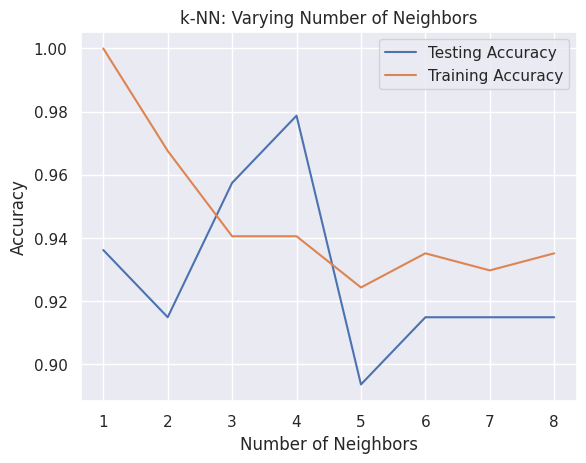

In [57]:
# Configuração dos arrays para armazenarem os valores de acurácia de treino e teste
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop para diferente valores do hiper-parâmetro k
for i, k in enumerate(neighbors):
    # Configurar um Classificador k-NN como k vizinhos: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit do modelo do classificador com os dados de treino
    knn.fit(X_train, y_train)

    #Computar acurácia com dados de treino
    train_accuracy[i] = knn.score(X_train, y_train)

    #Computar acurácia com dados de teste
    test_accuracy[i] = knn.score(X_test, y_test)

# Generação do Gráfico
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### 2.1.3 Exercício para casa: Homework

Utilize a base de dado de dígitos do MNIST:

site: http://yann.lecun.com/exdb/mnist/

O SciKit-Learn possui uma base dados simplificada.

- Trate a base de dados, como variáveis features e target.
- Separe os conjuntos de treinamento e teste (use o parâmetro test_size = 0.2).
- Treine como algorítmos K-NN, para k= 1,3,5,7.
- Obtenha os escores dos resultados para esses valores de k.

In [ ]:
# Exercício de Casa - Homework


# Não foi possível fazer o login no site para baixar


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

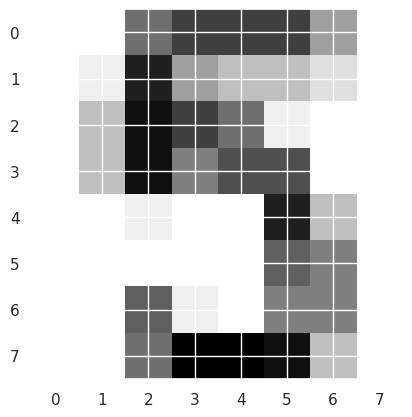

In [58]:
# Importação dos módulos necessários
from sklearn import datasets
import matplotlib.pyplot as plt

# CArregar base de dados: digits
digits = datasets.load_digits()

# Print das keys e DESCR (descrição) da base de dados
print(digits.keys())
print(digits.DESCR)

# Print o shape das imagens e dos data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

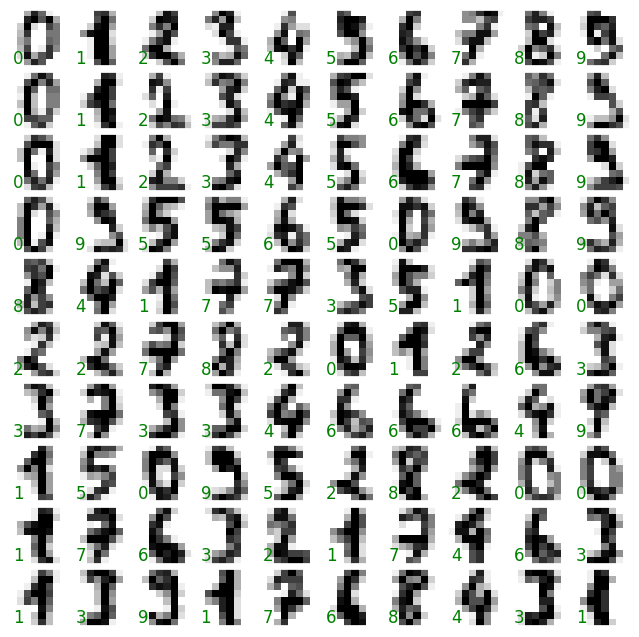

In [59]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

# 3. Técnicas para Divisão dos Conjuntos de Treinamento e Teste

Como se escolhe os dados paar treinamento e validação do modelo tem impacto direto no seu desempnho.

Há várias técnicas de escolhas dos dados de treinamento e validação do modelo.
    - Amostragem Aleatória (Holdout)
    - Valiadação Cruzada (CrossValidation)
    - Bootstrap

- Amostragem Aleatória é muito utilizada por sua simplicidade.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,        random_state=42, stratify=y)

- A técnica de Validação Cruzada é uma das utilizada.

scores = cross_val_score(modelo,X,y, cv=3)

In [73]:
# Exemplo com Validação por Amostragem Aleatória

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
knn = KNeighborsClassifier(n_neighbors=5)


X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)


knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [61]:
# Exemplo com Validação Cruzada

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()
knn = KNeighborsClassifier(n_neighbors=5)

#knn.fit(iris.data, iris.target)

scores = cross_val_score(knn, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [62]:
# Exemplo com Validação Cruzada
# Definindo o número de Folds (cv) - o padrão é cv=3

scores = cross_val_score(knn, iris.data, iris.target, cv=3)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.98 0.98 0.98]


# 4. Métricas de Avaliação de Modelos
- Taxa de Acerto
- Acurácia
- Precisão
- Recall
- Matriz de Confusão

In [80]:
# Exemplo de métricas de avaliação de classificadores

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.5, random_state=0)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [81]:
y_pred1 = knn.fit(X_train, y_train).predict(X_test)
print(y_pred - y_pred1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [82]:
# Calculando a Acurácia

from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
accuracy_score(y_test, y_model)

0.9066666666666666

In [83]:
# Obtendo a Matriz de Confusão
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[21  0  0]
 [ 0 28  2]
 [ 0  5 19]]


In [84]:
# Geração de relatório

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.85      0.93      0.89        30
           2       0.90      0.79      0.84        24

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



Plote da Matriz de Confusão com recursos do Seaborn.

In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

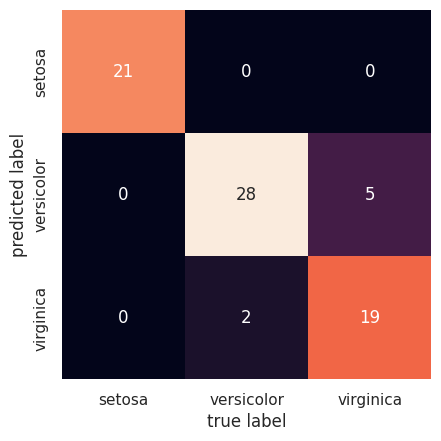

In [86]:
from sklearn.metrics import confusion_matrix

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 5. Normalização de Dados
O Pacote Sklearn possui várias outras funcionalidades para facilitar o desenvolvimento de aplicações baseadas em técnicas de aprendizagem de máquinas. Um exemplo é a normalização de dados de entrada do modelo.

- Refazendo o exemplo de classificação do dataset Iris com K-NN.

In [87]:
# Normalização com valores padrões
from sklearn.preprocessing import scale

# X_scaled = scale(X, axis=0, with_mean=True, with_std=True, copy=True)
X_scaled = scale(X)
np.mean(X), np.std(X)

(3.4644999999999997, 1.9738430577598278)

In [88]:
np.mean(X_scaled), np.std(X_scaled)

(-1.4684549872375404e-15, 1.0)

In [89]:
# Divisão dos dados e treinamento com dados escalonados

knn_scaled = KNeighborsClassifier(n_neighbors=1)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,
                                test_size=0.5, random_state=0)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

In [90]:
print("Test set score : {:.2f}".format(knn.score(X_test, y_test)))

Test set score : 0.91


In [91]:
print("Test set score: {:.2f}".format(knn_scaled.score(X_test_scaled, y_test)))

Test set score: 0.91


### Exercício para Casa- dataset Breast_cancer

In [92]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# carregar e seperar os dados paar treino e teste
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# computar os valores mínimos e máximos para os dados de treino
scaler = MinMaxScaler().fit(X_train)

# reescalonar os dados de treino
X_train_scaled = scaler.transform(X_train)

In [93]:
# Complete o exercício com treinamento com o algoritmo K-NN
knn2 = KNeighborsClassifier(n_neighbors=1)

In [96]:

# Aprendizagem do modelo K-NN com dados de treino escalonados
knn2.fit(X_train_scaled, y_train)
# escalonar dados de teste e escores com dados escalonados
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(knn2.score(X_test_scaled, y_test)))

Test score: 0.94


# 6. Pipelines
- O processo de pré-tratamento de dados pode se tornar rapidamente tedioso se for realizado "à mão", especialmente se desejar encadear várias etapas.
- Para tornar o pré-processmento dos dados mais automatizado, o SciKit-Learn possui uma classe pipeline:
    - from sklearn.pipeline import make_pipeline

- Um Pipeline básico é composto tipicamente das seguintes etapas:
    - Tratamento de Dados Faltantes - Missing Data
    - Escalonamento de Dados
    - Busca por hiperparâmetros adequados para os modelos de Aprendizagem de Máquina


## 6.1. Pipeline - Etapa de Missing Data
Etapa de pré-processamento de dados destinada remoção de dados inadequados (outliers, errados, etc) e ou imputação de dados quando houver dados faltantes.

In [97]:
# Considerando a base de dados Iris
from sklearn.datasets import load_iris

# Importação dos módulos necessários
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Imputar o valor médio onde houver NAN.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# Imputar o valor mais frequente onde houver NAN.
#imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')


knn1 = KNeighborsClassifier(n_neighbors=3)


steps = [('imputation', imp), ('knn', knn1)]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [102]:
# Fit - Pipeline

pipeline.fit(X_train, y_train)

# Predict - no Pipeline
y_pred = pipeline.predict(X_test)

print(pipeline.score(X_test, y_test))

1.0


In [103]:
# Computação de métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 6.2. Pipeline - Etapa de Escalonamento de Dados
Etapa de pré-processamento de dados destinada normalizar os valores das features dos modelos de aprendizagem de máquina, para que não haja preponderância de influência entre elas.

In [104]:
# Importação dos módulos necessários
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Setup do pipeline
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

# Criação do Pipeline: pipeline
pipeline = Pipeline(steps)

# Criação dos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit do pipeline par ao conjunto de treino: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instanciação e fit de um classificador do tipo k-NN com dados não escalonados
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Computação de métricas de desempenho
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 1.0
Accuracy without Scaling: 1.0


## 6.3. Pipeline - Etapa Busca por valor de Hiper-parâmetros
`-  Utilização do método GridSearchCV(.) para se avaliar o desempenho do modelo para um conjunto de valores de hiper-parâmetros.`

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

steps2 = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline2 = Pipeline(steps2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)



#n_neighbors
parameters = {'knn__n_neighbors': [1,3,5,7,9]}
cv = GridSearchCV(pipeline2, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(y_pred)

[1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 1 2 1 0 2 2 1 2 1 0 1 0 0 1 2]


In [106]:
print(cv.best_params_)

{'knn__n_neighbors': 3}


In [107]:
print(cv.score(X_test, y_test))

0.9666666666666667


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## 6.4. Pipeline - Exemplo com classificador SVM

In [110]:
# Exemplo de uso do Pipeline com classificador SVM

from sklearn.svm import SVC

# Setup do pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Definição do espaço de hiper-parâmetros analisado
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Criação dos conjuntos de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instanciação do objeto GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit para o conjunto de treino
cv.fit(X_train, y_train)

# Predição dos rótulos do conjunto de teste: y_pred
y_pred = cv.predict(X_test)

# Computação das métricas de desempenho
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


## Sugestão de Pacote para se fazer Pipeline

Como desenvolver uma aplicação baseada em aprendizagem de máquinas envolve várias etapas no tratamento e processamento dos dados, há a necessidade de se automatizar ao máximo essas atividades. Para isto, gera-e um procedimento sistemático para automatizar todo ou parte do processo, que é conhecido como Pipeline de processamento de Aprendizagem de Máquina.

Pacote Dabl:
- Opção para se criar pipeline para baseline (soluções básicas)
- Inclui pré-processamento e modelagem de aprendizagem de máquinas

https://towardsdatascience.com/creating-baseline-machine-learning-models-d40c99243311